# Lab 8: Data Management, Dates, and Categorical Data

In [1]:
options(repr.plot.width=6, repr.plot.height=4)
require(tidyverse)
require(stringr)
require(lubridate)

Loading required package: tidyverse
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lubridate

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



## Managing Data

The file `reddit_dirty.txt` contains a dirty version of the reddit comments dataset. To see the first few lines, we can use the command:

In [2]:
read_lines('reddit_dirty.txt', n_max=10)

[1] "postid: 1"                                                                                                                                                                                                                                                                                                                                                                                                       
 [2] "https://www.reddit.com/user/br_shadow"                                                                                                                                                                                                                                                                                                                                                                           
 [3] "Comment: Thank you for this, there is a person writing to me through facebook that's my only point of communication. He also sent me this, is there maybe a website to check its authenticity ? I was unable to find any lists of registered foundations in Uganda  https://scontent-syd2-1.xx.fbcdn.net/v/t34.0-12/25589975_2043006685934965_29416957_n.jpg?oh=088ca5a5d027b9c7f243b2bbcb0261f4&amp;oe=5A430D87"
 [4] "2017-12-25 15:49:08"                                                                                                                                                                                                                                                                                                                                                                                             
 [5] "postid: 2"                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "https://www.reddit.com/user/Ksalol"                                                                                                                                                                                                                                                                                                                                                                              
 [7] "Comment: They are not to quick actually. It's mainly the Fentanyl market that's ruining it for the rest of us! But 3f-pvp will probably get banned in 6-10 months, because it's going to be very popular and the goverment hates fun so."                                                                                                                                                                        
 [8] "2017-12-25 17:42:50"                                                                                                                                                                                                                                                                                                                                                                                             
 [9] "postid: 3"                                                                                                                                                                                                                                                                                                                                                                                                       
[10] "https://www.reddit.com/user/itscool83"

### Problem 1
Read in the data and store it in `posts1`. You should get a tibble that looks something like:

```{r}
# A tibble: 40,000 x 1
   var1                                                                        
   <chr>                                                                       
 1 1                                                                           
 2 https://www.reddit.com/user/br_shadow                                       
 3 Comment: Thank you for this, there is a person writing to me through facebo…
 4 2017-12-25 15:49:08                                                         
 5 2                                                                           
 6 https://www.reddit.com/user/Ksalol                                          
 7 Comment: They are not to quick actually. It's mainly the Fentanyl market th…
 8 2017-12-25 17:42:50                                                         
 9 3                                                                           
10 https://www.reddit.com/user/itscool83                                       
# ... with 39,990 more rows
```

In [3]:
posts1 = tibble(var1=read_lines('reddit_dirty.txt'))
head(posts1)

var1
postid: 1
https://www.reddit.com/user/br_shadow
"Comment: Thank you for this, there is a person writing to me through facebook that's my only point of communication. He also sent me this, is there maybe a website to check its authenticity ? I was unable to find any lists of registered foundations in Uganda https://scontent-syd2-1.xx.fbcdn.net/v/t34.0-12/25589975_2043006685934965_29416957_n.jpg?oh=088ca5a5d027b9c7f243b2bbcb0261f4&amp;oe=5A430D87"
2017-12-25 15:49:08
postid: 2
https://www.reddit.com/user/Ksalol


### Problem 2

Clean up `posts1` so that each row represents a single reddit post and each variable is in its own column. So you should end up with a table that looks like the following. Store this is `posts2`.

```{r}
# A tibble: 10,000 x 4
   postid user                                            body            time 
    <dbl> <chr>                                           <chr>           <chr>
 1      1 https://www.reddit.com/user/br_shadow           Comment: Thank… 2017…
 2      2 https://www.reddit.com/user/Ksalol              Comment: They … 2017…
 3      3 https://www.reddit.com/user/itscool83           Comment: tell … 2017…
 4      4 https://www.reddit.com/user/Glu7enFree          "Comment: Auti… 2017…
 5      5 https://www.reddit.com/user/Theotheogreato      "Comment: You … 2017…
 6      6 https://www.reddit.com/user/Shadrac121          Comment: Hopfu… 2017…
 7      7 https://www.reddit.com/user/1fzUjhemoSB1QV7zI7  Comment: Si ce… 2017…
 8      8 https://www.reddit.com/user/MinisterOfEducation Comment: I don… 2017…
 9      9 https://www.reddit.com/user/AabidS10            Comment: i don… 2017…
10     10 https://www.reddit.com/user/S3RG10              "Comment: I'm … 2017…
# ... with 9,990 more rows
```

In [4]:
posts2 = posts1 %>% mutate(varnum = (row_number()-1) %% 4) %>% # give variable unique names
    mutate(postid = ceiling(row_number()/4))
head(posts2)

posts2 = posts2 %>% spread(key=varnum, value=var1) %>%  # varnum is the unique key 
    select(postid, postid2=`0`, user=`1`, body=`2`, time=`3`) 

all(as.integer(str_extract(posts2$postid2, '\\d+')) == posts2$postid)  # Checking that the rows match up

posts2 = posts2 %>% select(-postid2)
head(posts2)

var1,varnum,postid
postid: 1,0,1
https://www.reddit.com/user/br_shadow,1,1
"Comment: Thank you for this, there is a person writing to me through facebook that's my only point of communication. He also sent me this, is there maybe a website to check its authenticity ? I was unable to find any lists of registered foundations in Uganda https://scontent-syd2-1.xx.fbcdn.net/v/t34.0-12/25589975_2043006685934965_29416957_n.jpg?oh=088ca5a5d027b9c7f243b2bbcb0261f4&amp;oe=5A430D87",2,1
2017-12-25 15:49:08,3,1
postid: 2,0,2
https://www.reddit.com/user/Ksalol,1,2


[1] TRUE

postid,user,body,time
1,https://www.reddit.com/user/br_shadow,"Comment: Thank you for this, there is a person writing to me through facebook that's my only point of communication. He also sent me this, is there maybe a website to check its authenticity ? I was unable to find any lists of registered foundations in Uganda https://scontent-syd2-1.xx.fbcdn.net/v/t34.0-12/25589975_2043006685934965_29416957_n.jpg?oh=088ca5a5d027b9c7f243b2bbcb0261f4&amp;oe=5A430D87",2017-12-25 15:49:08
2,https://www.reddit.com/user/Ksalol,"Comment: They are not to quick actually. It's mainly the Fentanyl market that's ruining it for the rest of us! But 3f-pvp will probably get banned in 6-10 months, because it's going to be very popular and the goverment hates fun so.",2017-12-25 17:42:50
3,https://www.reddit.com/user/itscool83,Comment: tell her you guys should hang out when you guys are back at school,2017-12-25 18:54:13
4,https://www.reddit.com/user/Glu7enFree,"Comment: Autism is a high honor in the tech savvy mischievous meme addicted community. Autism isn't a pejorative but a badge of honor and understanding. Anon always aspires to be autistic and not be complacent with globalist shill tendies. To be autistic is to be part of keks army and to feed off of meme magick. Meme magick surrounds us all. Normies try to control memes and enforce their societal norms on it. This angers kek for kek gave us the gift of meme magick to shape the world. When a bunch of autists come together and harness the memes they can do anything. When a normie hears Hillary Clinton talk about the dangers of a cartoon frog, she is discredited. But we know, we plan, we meme.",2017-12-25 07:48:17
5,https://www.reddit.com/user/Theotheogreato,Comment: You thought a cat was your son?!,2017-12-25 20:58:08
6,https://www.reddit.com/user/Shadrac121,Comment: Hopfully she takes wat people say in and makes some changes for another one and not just stops doing it all together,2017-12-25 22:27:31


### Problem 3
Note that for this and the following questions, you may want to have the `lubridate` documentation handy (https://lubridate.tidyverse.org/reference/index.html). 

Further process the data by cleaning up the `user` and `body` fields to remove the url and `"Comment: "` portions. Also note that in `posts2` above the `time` variable is a string. Convert this to a datetime object. Store this cleaned data in `posts3`. It should look like:

```{r}
# A tibble: 10,000 x 4
   postid user                body                          time               
    <dbl> <chr>               <chr>                         <dttm>             
 1      1 br_shadow           Thank you for this, there is… 2017-12-25 15:49:08
 2      2 Ksalol              They are not to quick actual… 2017-12-25 17:42:50
 3      3 itscool83           tell her you guys should han… 2017-12-25 18:54:13
 4      4 Glu7enFree          "Autism is a high honor in t… 2017-12-25 07:48:17
 5      5 Theotheogreato      "You thought a cat was your … 2017-12-25 20:58:08
 6      6 Shadrac121          Hopfully she takes wat peopl… 2017-12-25 22:27:31
 7      7 1fzUjhemoSB1QV7zI7  Si ce propui sa facem cu toa… 2017-12-25 07:41:31
 8      8 MinisterOfEducation I don't mean to be impolite,… 2017-12-25 19:28:35
 9      9 AabidS10            i dont have a 720p x265 of i… 2017-12-25 13:20:32
10     10 S3RG10              "I'm dying to try Guatemalan… 2017-12-25 00:48:46
# ... with 9,990 more rows
```

In [5]:
posts3 = posts2 %>% mutate(time = ymd_hms(time), 
                           user = str_replace(user, 'https://www.reddit.com/user/', ''),
                           body = str_replace(body, 'Comment: ', ''))

head(posts3)

postid,user,body,time
1,br_shadow,"Thank you for this, there is a person writing to me through facebook that's my only point of communication. He also sent me this, is there maybe a website to check its authenticity ? I was unable to find any lists of registered foundations in Uganda https://scontent-syd2-1.xx.fbcdn.net/v/t34.0-12/25589975_2043006685934965_29416957_n.jpg?oh=088ca5a5d027b9c7f243b2bbcb0261f4&amp;oe=5A430D87",2017-12-25 15:49:08
2,Ksalol,"They are not to quick actually. It's mainly the Fentanyl market that's ruining it for the rest of us! But 3f-pvp will probably get banned in 6-10 months, because it's going to be very popular and the goverment hates fun so.",2017-12-25 17:42:50
3,itscool83,tell her you guys should hang out when you guys are back at school,2017-12-25 18:54:13
4,Glu7enFree,"Autism is a high honor in the tech savvy mischievous meme addicted community. Autism isn't a pejorative but a badge of honor and understanding. Anon always aspires to be autistic and not be complacent with globalist shill tendies. To be autistic is to be part of keks army and to feed off of meme magick. Meme magick surrounds us all. Normies try to control memes and enforce their societal norms on it. This angers kek for kek gave us the gift of meme magick to shape the world. When a bunch of autists come together and harness the memes they can do anything. When a normie hears Hillary Clinton talk about the dangers of a cartoon frog, she is discredited. But we know, we plan, we meme.",2017-12-25 07:48:17
5,Theotheogreato,You thought a cat was your son?!,2017-12-25 20:58:08
6,Shadrac121,Hopfully she takes wat people say in and makes some changes for another one and not just stops doing it all together,2017-12-25 22:27:31


### Problem 4
Sort the data by time of the post. For each post, calculate the duration between that post and the previous post. Write code that plots a histogram of these values.

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

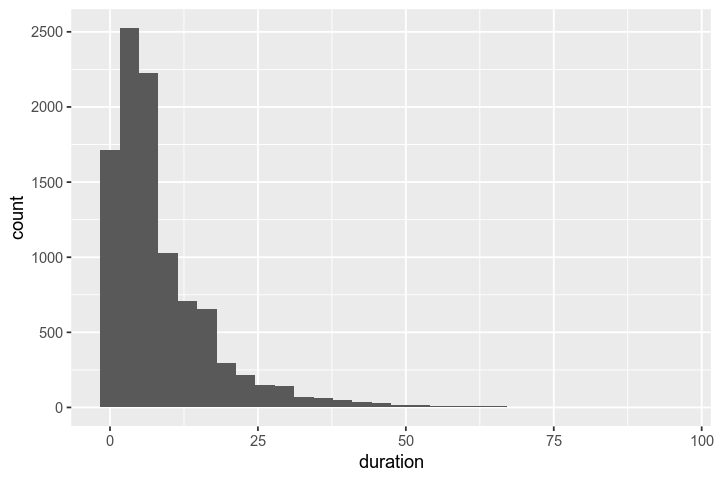

In [6]:
posts4 = posts3 %>% arrange(time) %>% mutate(duration = time - lag(time))

ggplot(posts4, aes(x=duration)) + geom_histogram()

### Problem 5
Note that the times are currently in the UTC timezone. Convert these to EST (`"America/New_York"`). Then group the data by hour and calculate the mean and the median post length for each hour. Plot these as a line graph.

hour,statistic,length
0,median_length,61.0
1,median_length,72.0
2,median_length,57.0
3,median_length,56.0
4,median_length,66.0
5,median_length,74.5


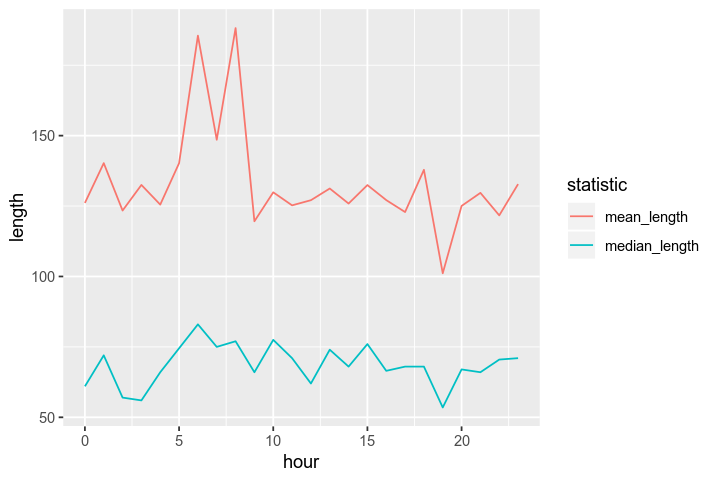

In [7]:
posts5 = posts4 %>% mutate(time = with_tz(time, "America/New_York")) %>%
    mutate(length=str_length(body), hour = hour(time)) %>%
    group_by(hour) %>% summarize(median_length=median(length),
                                mean_length = mean(length))%>%
    gather("statistic", "length", median_length, mean_length)
head(posts5)
ggplot(posts5,aes(x=hour, y=length, col = statistic)) + geom_line()

### Problem 6
Can you make the same plot as Problem 5, but instead grouping posts into 5-minute intervals?

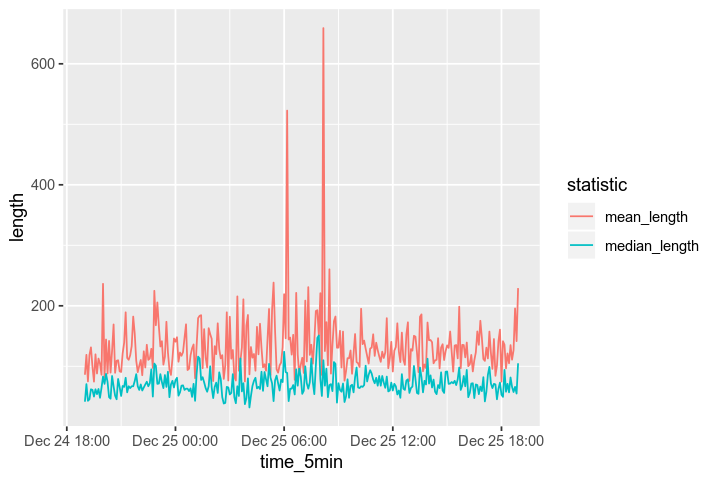

In [8]:
posts6 = posts4 %>% mutate(time = with_tz(time, "America/New_York")) %>%
    mutate(length=str_length(body), time_5min = floor_date(time, unit='5 minute')) %>%
    group_by(time_5min) %>% summarize(median_length=median(length),
                                mean_length = mean(length))%>%
    gather("statistic", "length", median_length, mean_length)

ggplot(posts6, aes(x=time_5min, y=length, col = statistic)) + geom_line()

## Logistic Regression Basics

This tutorial primarily leverages the `Default` data provided by the `ISLR` package (located in the working directory for you). This is a simulated data set containing information on ten thousand customers such as whether the customer defaulted, is a student, the average balance carried by the customer and the income of the customer (Source: UC Business Analytics R Programming Guide [ https://uc-r.github.io/logistic_regression ]).

In [9]:
library(tidyverse)  # data manipulation and visualization
library(modelr)     # provides easy pipeline modeling functions
library(broom)      # helps to tidy up model outputs


Attaching package: ‘broom’

The following object is masked from ‘package:modelr’:

    bootstrap



In [10]:
default <- as_tibble(read_csv("Default.csv")) %>% print

Parsed with column specification:
cols(
  default = col_character(),
  student = col_character(),
  balance = col_double(),
  income = col_double()
)


# A tibble: 10,000 x 4
   default student balance income
   <chr>   <chr>     <dbl>  <dbl>
 1 No      No         730. 44362.
 2 No      Yes        817. 12106.
 3 No      No        1074. 31767.
 4 No      No         529. 35704.
 5 No      No         786. 38463.
 6 No      Yes        920.  7492.
 7 No      No         826. 24905.
 8 No      Yes        809. 17600.
 9 No      No        1161. 37469.
10 No      No           0  29275.
# … with 9,990 more rows


If we are trying to classify a customer as a high- vs. low-risk defaulter based on their balance we could use linear regression; however, the figure below illustrates how linear regression would predict the probability of defaulting. Unfortunately, for balances close to zero we predict a negative probability of defaulting; if we were to predict for very large balances, we would get values bigger than 1. These predictions are not sensible, since of course the true probability of defaulting, regardless of credit card balance, must fall between 0 and 1.

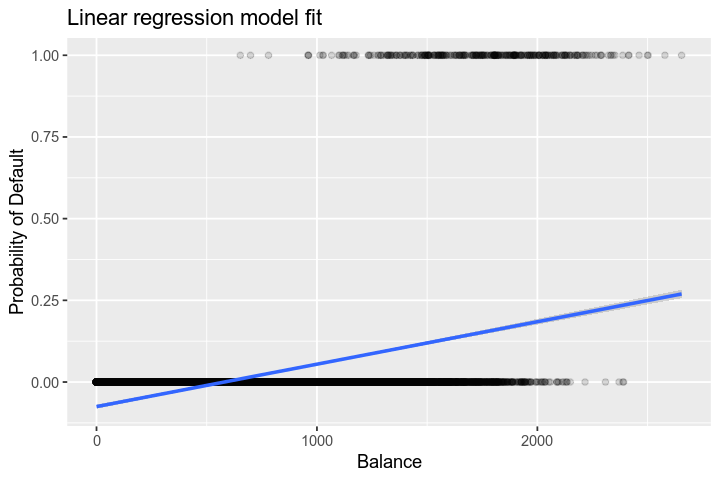

In [11]:
default %>%
  mutate(prob = ifelse(default == "Yes", 1, 0)) %>%
  ggplot(aes(balance, prob)) +
  geom_point(alpha = .15) +
  geom_smooth(method = "lm") +
  ggtitle("Linear regression model fit") +
  xlab("Balance") +
  ylab("Probability of Default")

To avoid this problem, we must model p(X) using a function that gives outputs between 0 and 1 for all values of X.

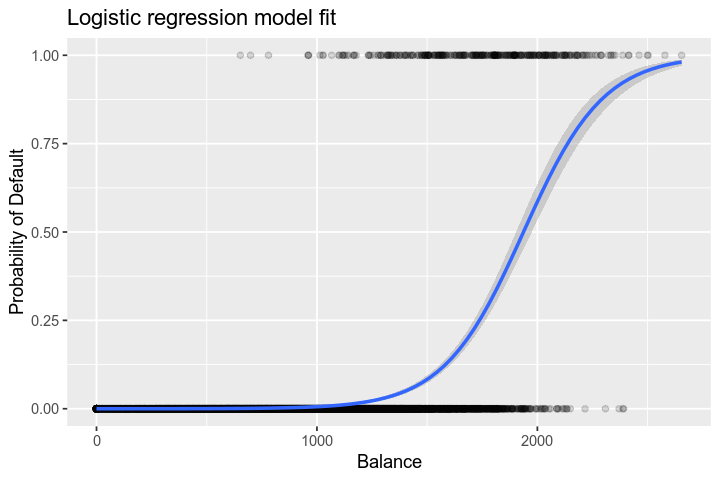

In [12]:
default %>%
  mutate(prob = ifelse(default == "Yes", 1, 0)) %>%
  ggplot(aes(balance, prob)) +
  geom_point(alpha = .15) +
  geom_smooth(method = "glm", method.args = list(family = "binomial")) +
  ggtitle("Logistic regression model fit") +
  xlab("Balance") +
  ylab("Probability of Default")

### Model fitting

In [13]:
default_glm <- default %>% mutate(prob = ifelse(default == "Yes", 1, 0))
model1 <- glm(prob ~ balance, family = "binomial", data = default_glm)
summary(model1)


Call:
glm(formula = prob ~ balance, family = "binomial", data = default_glm)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2697  -0.1465  -0.0589  -0.0221   3.7589  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.065e+01  3.612e-01  -29.49   <2e-16 ***
balance      5.499e-03  2.204e-04   24.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1596.5  on 9998  degrees of freedom
AIC: 1600.5

Number of Fisher Scoring iterations: 8


### Assessing coefficients

The below table shows the coefficient estimates and related information that result from fitting a logistic regression model in order to predict the probability of default = Yes using balance. Bear in mind that the coefficient estimates from logistic regression characterize the relationship between the predictor and response variable on a log-odds scale. Thus, we see that $\hat{\beta}_1 = 0.0055$; this indicates that an increase in balance is associated with an increase in the probability of default. To be precise, a one-unit increase in balance is associated with an increase in the log odds of default by 0.0055 units.

In [14]:
tidy(model1)

term,estimate,std.error,statistic,p.value
(Intercept),-10.651330614,0.3611573721,-29.49221,3.623124e-191
balance,0.005498917,0.0002203702,24.95309,1.976602e-137


We can further interpret the balance coefficient as: for every one dollar increase in monthly balance carried, the odds of the customer defaulting increases by a factor of 1.0055.

In [15]:
exp(coef(model1))

(Intercept)      balance 
2.366933e-05 1.005514e+00

Many aspects of the coefficient output are similar to those discussed in the linear regression output. For example, we can measure the confidence intervals and accuracy of the coefficient estimates by computing their standard errors. For instance, the estimated coefficient has a p-value < 2e-16 suggesting a statistically significant **LINEAR** relationship between balance carried and the probability of defaulting. We can also use the standard errors to get confidence intervals:

In [16]:
confint(model1)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-11.383288936,-9.966565064
balance,0.005078926,0.005943365


In [17]:
fits = ifelse(model1$fitted.values>0.5, "Yes", "No")

conf.matrix = table(fits, true = default$student)
tidy(conf.matrix)

classification_rate = sum(diag(conf.matrix))/sum(conf.matrix)
classification_rate

fits,true,n
No,No,6996
Yes,No,60
No,Yes,2862
Yes,Yes,82


[1] 0.7078